In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
### Load training data
training_data_raw = []
training_label = []
test_data_name = []
test_data = []

for dirname, _, filenames in os.walk('/kaggle/input/cs-ioc5008-hw1/dataset/dataset/train'):
    for filename in filenames:
        label = dirname.split('/')
        training_label.append(label[7])
        image = plt.imread(os.path.join(dirname, filename))
        training_data_raw.append(image)
        
training_data_length = len(training_label)
training_data = training_data_raw

### Load test data
for dirname, _, filenames in os.walk('/kaggle/input/cs-ioc5008-hw1/dataset/dataset/test'):
    for filename in filenames:
        test_data_name.append(filename)
        image = plt.imread(os.path.join(dirname, filename))
        test_data.append(image)

#print(len(test_data))
#print(test_data_name[123])
#image = test_data[123]
#plt.imshow(image, cmap='gray')
#plt.show()
print("Number of training data =", len(training_data))
print("Number of test data =", len(test_data))
n_classes = len(np.unique(training_label))
print("Number of classes =", n_classes)

#for image in training_data:
#    image_shape = image.shape
#    print("Image data shape =", image_shape)

#index = 320
#image = training_data[index]
#plt.imshow(image, cmap='gray')
#plt.show()
#print(training_label[index])

#print(type(image))
#print(image)
#training_data = (training_data - 128.0) / 128.0

#index = 100
#image = training_data[index]
#plt.imshow(image, cmap='gray')
#plt.show()
#print(training_label[index])

#training_data, training_label = shuffle(training_data, training_label)

#index = 100
#image = training_data[index]
#plt.imshow(image, cmap='gray')
#plt.show()
#print(training_label[index])"""

Number of training data = 2819
Number of test data = 1040
Number of classes = 13


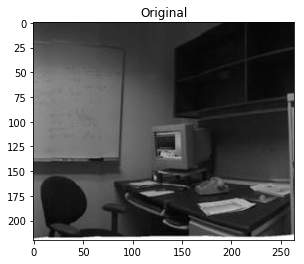

(220, 264)
office


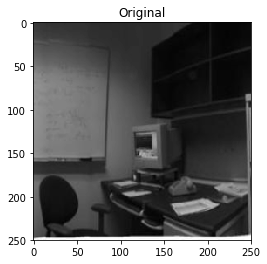

[[ 60  60  59 ...  10  10  10]
 [ 60  60  59 ...  10  10  10]
 [ 60  60  59 ...  10  10  10]
 ...
 [123 130 142 ... 253 253 253]
 [211 217 228 ... 254 254 254]
 [250 252 255 ... 255 255 255]]
(250, 250)


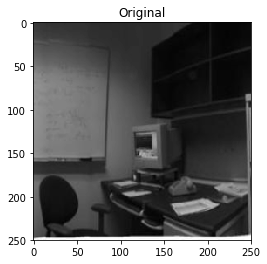

[[-0.53125   -0.53125   -0.5390625 ... -0.921875  -0.921875  -0.921875 ]
 [-0.53125   -0.53125   -0.5390625 ... -0.921875  -0.921875  -0.921875 ]
 [-0.53125   -0.53125   -0.5390625 ... -0.921875  -0.921875  -0.921875 ]
 ...
 [-0.0390625  0.015625   0.109375  ...  0.9765625  0.9765625  0.9765625]
 [ 0.6484375  0.6953125  0.78125   ...  0.984375   0.984375   0.984375 ]
 [ 0.953125   0.96875    0.9921875 ...  0.9921875  0.9921875  0.9921875]]
(250, 250)


In [2]:
### Data Preprocess
import cv2
def display_one(a, title1="Original"):
    plt.imshow(a, cmap='gray')
    plt.title(title1)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()
    
def display(a, b, title1="Original", title2="Edited"):
    plt.subplot(121)
    plt.imshow(a, cmap='gray')
    plt.title(title1)
    #plt.xticks([])
    #plt.yticks([])
    plt.subplot(122)
    plt.imshow(b, cmap='gray')
    plt.title(title2)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()
    
def processing(image_data):
    #img = [data[123], data[1054], data[156]]
    #print("Original size:", img[1].shape)
    #print(training_label[1054])
    #original = img[1]
    #display_one(original)
    
    height = 250
    width = 250
    dim = (width, height)
    res_img = []
    
    for i in range(len(image_data)):
        res = cv2.resize(image_data[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)
    
    return res_img
    #print("RESIZED", res_img[1].shape)
    
    #original = res_img[1]
    #display_one(original)

img = training_data[40]
display_one(img)
print(img.shape)
print(training_label[40])
resize_data = processing(training_data)
#print(len(resize_data))

img = resize_data[40]
display_one(img)
print(img)
print(img.shape)

### Normalization
for i in range(len(resize_data)):
    resize_data[i] = (resize_data[i] - 128.0) / 128.0
    
img = resize_data[40]
display_one(img)
print(img)
print(img.shape)

In [3]:
### Data Augmentation
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

augmented_data = resize_data.copy()
augmented_data_label = training_label.copy()
#print(len(augmented_data))
#print(len(augmented_data_label))
#testing_image = resize_data[2053]
#print(training_label[2053])
#print(type(testing_image))
#display_one(testing_image)
#aug_image = horizontal_flip(testing_image)
#display_one(aug_image)

# dictionary of the transformations functions we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

# random num of transformations to apply
#print(len(available_transformations))
#total = 0
#print(num_transformations_to_apply)

for i in range(9250):
    index = random.randint(1, len(resize_data)-1)
    current_image_label = training_label[index]
    
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    
    #total += (num_transformations_to_apply + 1)
    
    num_transformations = 0
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        #print(key)
        transformed_image = available_transformations[key](resize_data[index])
        augmented_data.append(transformed_image)
        augmented_data_label.append(current_image_label)
        #display_one(transformed_image)
        num_transformations += 1

#print(total)
#print(len(resize_data))
#print(len(training_label))   
print(len(augmented_data))
print(len(augmented_data_label))        
#display_one(resize_data[index])
#print(training_label[index])

30798
30798


In [4]:
### Model Architecture
def scene_classification_model(x):
    mu = 0.0
    sigma = 0.1
    dropout = 0.8
    
    # Layer 1: Convolutional. Input = 250x250xNone. Output = 244x244x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, dropout)
    # Pooling. Input = 244x244x6. Output = 122x122x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv1 = tf.nn.dropout(conv1, dropout)

    # Layer 2: Convolutional. Output = 116x116x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, dropout)
    # Pooling. Input = 116x116x16. Output = 58x58x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv2 = tf.nn.dropout(conv2, dropout)
    
    # Layer 3: Convolutional. Output = 52x52x24.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 16, 24), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(24))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # Activation.
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, dropout)
    # Pooling. Input = 52x52x24. Output = 26x26x24.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv3 = tf.nn.dropout(conv3, dropout)
    
    # Layer 4: Convolutional. Output = 20x20x32.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 24, 32), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(32))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    # Activation.
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.nn.dropout(conv4, dropout)
    # Pooling. Input = 20x20x32. Output = 10x10x32.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv4 = tf.nn.dropout(conv4, dropout)
    
    # Layer 5: Convolutional. Output = 6x6x40.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 40), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(40))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    # Activation.
    conv5 = tf.nn.relu(conv5)
    conv5 = tf.nn.dropout(conv5, dropout)
    # Pooling. Input = 6x6x40. Output = 3x3x40.
    conv5 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv5 = tf.nn.dropout(conv5, dropout)

    # Flatten. Input = 3x3x40. Output = 360.
    fc0   = flatten(conv5)
    
    # Layer 6: Fully Connected. Input = 360. Output = 108.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(360, 108), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(108))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(tf.nn.relu(fc1), dropout)

    # Layer 7: Fully Connected. Input = 108. Output = 40.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(108, 40), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(40))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(tf.nn.relu(fc2), dropout)

    # Layer 8: Fully Connected. Input = 40. Output = 13.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(40, 13), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(13))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#display_one(augmented_data[100])
#print(augmented_data_label[100])
#print(augmented_data[0].shape)

#augmented_data, augmented_data_label = shuffle(augmented_data, augmented_data_label)
for i in range(len(augmented_data)):
    augmented_data[i] = augmented_data[i].reshape(250, 250, 1)
#scene_classification_model()
#print(augmented_data[0].shape)
#display_one(augmented_data[100])
#print(augmented_data_label[100])
scene_number = {
    'bedroom': 0,
    'coast': 1,
    'forest': 2,
    'highway': 3,
    'insidecity': 4,
    'kitchen': 5,
    'livingroom': 6,
    'mountain': 7,
    'office': 8,
    'opencountry': 9,
    'street': 10,
    'suburb': 11,
    'tallbuilding': 12
}

augmented_data_label_number = []

for label in augmented_data_label:
    augmented_data_label_number.append(scene_number[label])
#print(augmented_data_label)
print(len(augmented_data_label_number))
#print(augmented_data_label_number)

30798


In [5]:
### Train model
from sklearn.utils import shuffle
import tensorflow as tf
# Hyperparameters
EPOCHS = 45
BATCH_SIZE = 128
rate = 0.001

x = tf.placeholder(tf.float32, (None, 250, 250, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 13)
keep_prob = tf.placeholder(tf.float32)

logits = scene_classification_model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(data, label):
    num_examples = len(data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = data[offset:offset+BATCH_SIZE], label[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    return total_loss / num_examples, total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(augmented_data)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        augmented_data, augmented_data_label_number = shuffle(augmented_data, augmented_data_label_number)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = augmented_data[offset:end], augmented_data_label_number[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        train_loss, train_accuracy = evaluate(augmented_data, augmented_data_label_number)
        print("EPOCH {} ...".format(i + 1))
        print("Train loss = {:.3f}".format(train_loss))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
    
    saver.save(sess, './scene_model')
    print("Model saved")
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) 

Training...

EPOCH 1 ...
Train loss = 1.965
Train Accuracy = 0.326

EPOCH 2 ...
Train loss = 1.331
Train Accuracy = 0.530

EPOCH 3 ...
Train loss = 1.107
Train Accuracy = 0.606

EPOCH 4 ...
Train loss = 0.839
Train Accuracy = 0.698

EPOCH 5 ...
Train loss = 0.797
Train Accuracy = 0.711

EPOCH 6 ...
Train loss = 0.725
Train Accuracy = 0.740

EPOCH 7 ...
Train loss = 0.592
Train Accuracy = 0.790

EPOCH 8 ...
Train loss = 0.486
Train Accuracy = 0.827

EPOCH 9 ...
Train loss = 0.515
Train Accuracy = 0.818

EPOCH 10 ...
Train loss = 0.405
Train Accuracy = 0.856

EPOCH 11 ...
Train loss = 0.408
Train Accuracy = 0.853

EPOCH 12 ...
Train loss = 0.360
Train Accuracy = 0.875

EPOCH 13 ...
Train loss = 0.318
Train Accuracy = 0.891

EPOCH 14 ...
Train loss = 0.300
Train Accuracy = 0.895

EPOCH 15 ...
Train loss = 0.289
Train Accuracy = 0.902

EPOCH 16 ...
Train loss = 0.310
Train Accuracy = 0.893

EPOCH 17 ...
Train loss = 0.240
Train Accuracy = 0.917

EPOCH 18 ...
Train loss = 0.238
Train Accura

In [6]:
test_data_reshape = processing(test_data)

for i in range(len(test_data_reshape)):
    test_data_reshape[i] = (test_data_reshape[i] - 128.0) / 128.0
    
for i in range(len(test_data_reshape)):
    test_data_reshape[i] = test_data_reshape[i].reshape(250, 250, 1)
print(len(test_data_reshape))
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    out = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict = {x: test_data_reshape})
print (out)

scene_detail = ["bedroom", "coast", "forest", "highway", "insidecity", "kitchen", "livingroom", "mountain", "office", "opencountry", "street", "suburb", "tallbuilding"]

1040
TopKV2(values=array([[9.9998915e-01, 1.0577971e-05, 2.5483490e-07, 5.2077218e-09,
        3.7165984e-09],
       [7.3954368e-01, 2.2276868e-01, 2.0147024e-02, 3.9080055e-03,
        3.6375169e-03],
       [9.9778640e-01, 2.2109670e-03, 1.8372499e-06, 7.6204083e-07,
        3.7835754e-08],
       ...,
       [9.4662762e-01, 4.7686771e-02, 3.7378750e-03, 1.9239208e-03,
        2.3809256e-05],
       [9.9999225e-01, 7.7040395e-06, 2.7598750e-09, 9.5887222e-11,
        3.4402172e-11],
       [9.9998569e-01, 1.2695652e-05, 1.4681252e-06, 7.8308254e-08,
        2.5242693e-08]], dtype=float32), indices=array([[ 2,  9,  7, 11, 12],
       [ 4, 10,  5, 12,  7],
       [11,  5,  4,  7,  6],
       ...,
       [ 5,  8,  6,  0,  4],
       [ 5,  6,  4,  0, 12],
       [ 7, 10,  4,  2,  3]], dtype=int32))


In [7]:
#print(len(out[1]))
#for i in range(len(out[1])):
#    print (":".format(i+1), scene_detail[out[1][i][0]])
#    print ()
print("id,label")
for i in range(len(out[1])):
    name_arr = test_data_name[i].split('.')
    name = name_arr[0]
    print(name+","+scene_detail[out[1][i][0]])

id,label
image_0149,forest
image_0298,insidecity
image_0543,suburb
image_0722,kitchen
image_0370,bedroom
image_0221,opencountry
image_0832,suburb
image_0553,office
image_0068,livingroom
image_0095,kitchen
image_0991,coast
image_0031,forest
image_0268,forest
image_0491,mountain
image_0590,street
image_0158,livingroom
image_0355,tallbuilding
image_0169,office
image_0431,highway
image_0200,suburb
image_0054,livingroom
image_0880,highway
image_0222,suburb
image_0723,kitchen
image_0828,kitchen
image_0106,opencountry
image_0287,insidecity
image_0346,suburb
image_0266,livingroom
image_1020,highway
image_0611,livingroom
image_1009,tallbuilding
image_0588,insidecity
image_0164,coast
image_0243,tallbuilding
image_0094,opencountry
image_0847,bedroom
image_0701,highway
image_0468,street
image_0044,insidecity
image_0864,insidecity
image_0968,mountain
image_0025,highway
image_0043,livingroom
image_0123,coast
image_0873,mountain
image_0999,coast
image_0080,opencountry
image_0117,office
image_0394,hig